In [1]:
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.stattools import acf, pacf

In [2]:
def ARMA_11(phi0, phi1, th1, ss, n):
    L = []
    w = np.random.normal(0, ss**0.5, n+1) #w[0],...,w[n]
    x0 = 0
    for t in range(1, n+1): #t=1,2,...,n
        xt = phi0 + phi1*x0 + w[t] + th1*w[t-1]
        L.append(xt)
        x0 = xt
    # plt.plot(L)
    # plt.show()
    return L

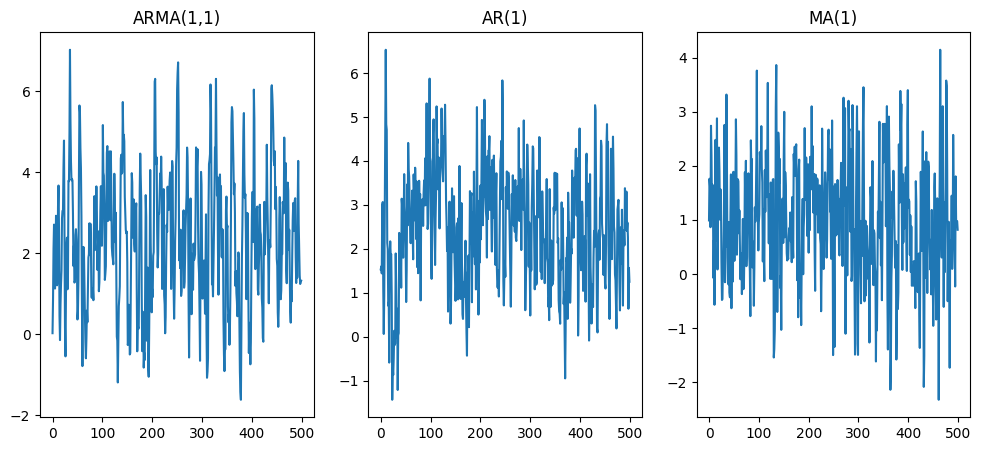

In [3]:
fig, axes = plt.subplots(1, 3, figsize=(12, 5))

# ARMA(1,1) 프로세스 플로팅
Arma11 = ARMA_11(1, 0.6, 0.4, 1, 500)
axes[0].plot(Arma11)
axes[0].set_title('ARMA(1,1)')

# AR(1) 프로세스 플로팅
Ar1 = ARMA_11(1, 0.6, 0, 1, 500)
axes[1].plot(Ar1)
axes[1].set_title('AR(1)')

# MA(1) 프로세스 플로팅
Ma1 = ARMA_11(1, 0, 0.4, 1, 500)
axes[2].plot(Ma1)
axes[2].set_title('MA(1)')

plt.show()

In [4]:
def ARMA_22(phi0, phi1, phi2, th1, th2, ss, n):
    L = []
    w = np.random.normal(0, ss**0.5, n+2) #w[0], w[1],...,w[n+1]
    x00, x0 = 0, 0
    for t in range(2, n+2): #t=2,3,...,n+1 모두 n개
        xt = phi0 + phi1*x0 + phi2*x00 + w[t] +th1*w[t-1] + th2*w[t-2]
        L.append(xt)
        x00 = x0
        x0 = xt
    plt.plot(L)
    plt.show()
    return L

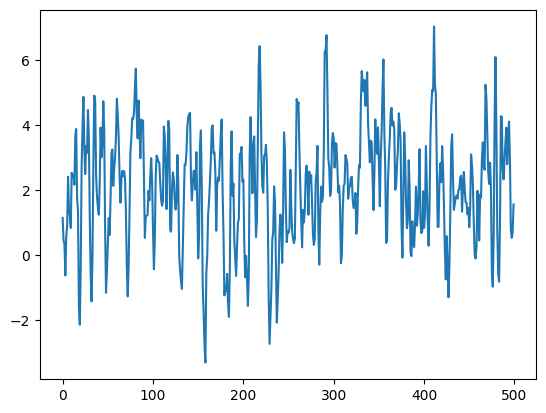

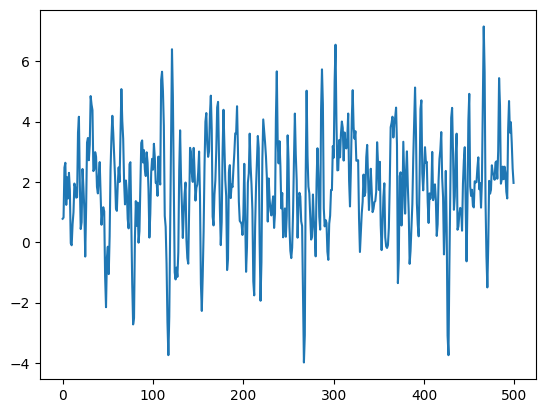

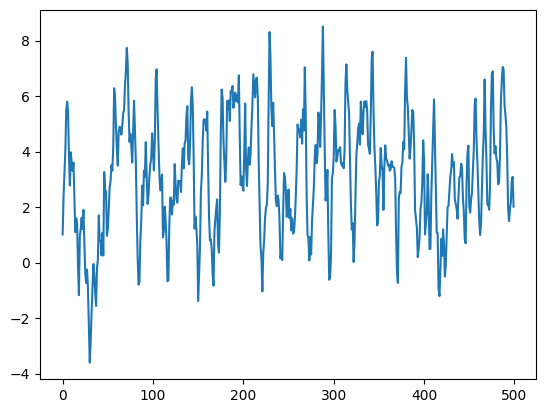

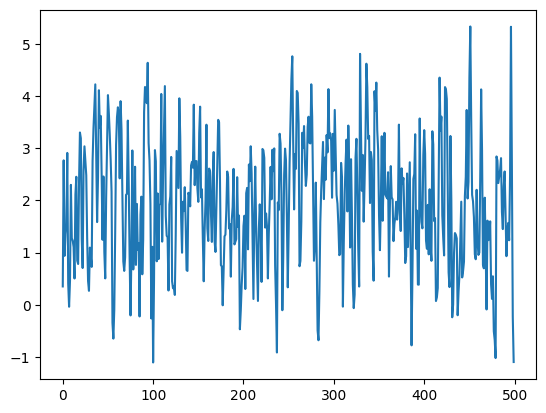

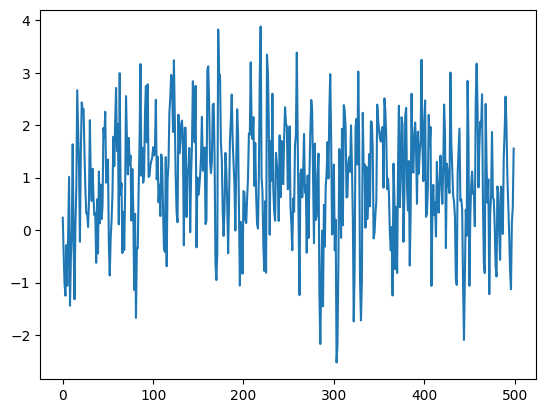

In [5]:
Arma22 = ARMA_22(1, 0.7, -0.2, 0.5, 0.2, 1, 500)
Arma21 = ARMA_22(1, 0.7, -0.2, 0.5, 0, 1, 500)
Arma12 = ARMA_22(1, 0.7, 0, 0.5, 0.2, 1, 500)
Ar2 = ARMA_22(1, 0.7, -0.2, 0, 0, 1, 500)
Ma2 = ARMA_22(1, 0, 0, 0.5, 0.2, 1, 500)

In [6]:
def ACF(D):
    x = D
    n = len(D)
    mu = np.mean(D)
    L = []
    for h in range(21): #h=0,1,2,...,20
        Lh = []
        for t in range(0, n-h):
            ac = (x[t+h] - mu)*(x[t]-mu)
            Lh.append(ac)
        autocov_h = sum(Lh)/n
        L.append(autocov_h)
    AutoCov = np.array(L)
    Sacf = AutoCov/AutoCov[0]
    plt.plot(Sacf, marker = 'o')
    y = [0 for t in range(21)]
    plt.plot(y, 'black')
    plt.show()
    return Sacf

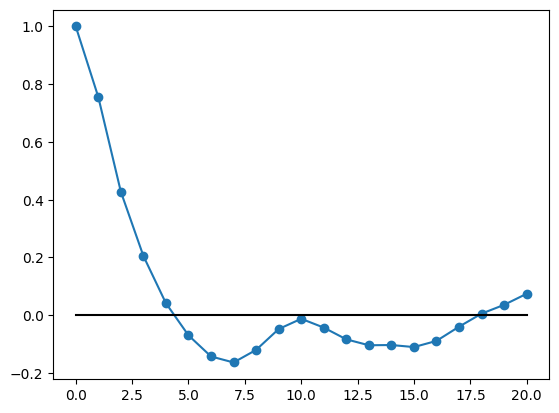

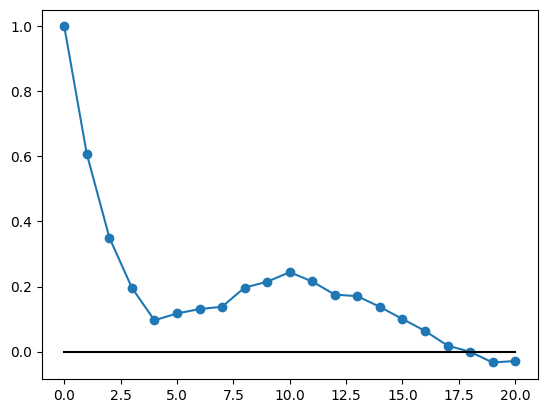

In [7]:
rho_11 = ACF(Arma11)
rho_10 = ACF(Ar1)

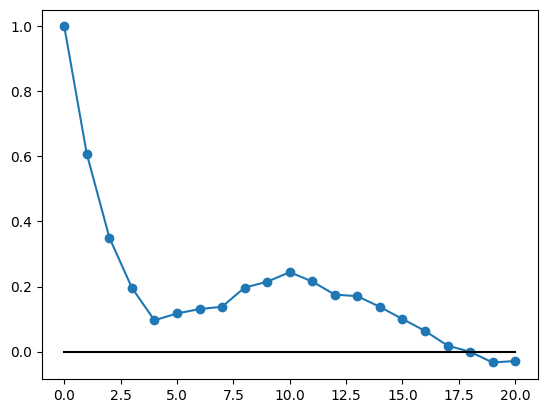

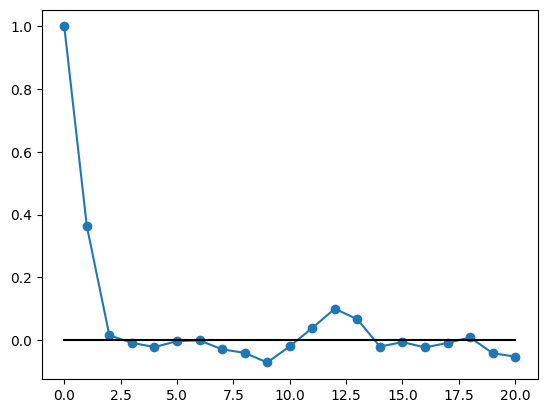

In [8]:
rho_10 = ACF(Ar1)
rho_01 = ACF(Ma1) #2일때부터 cut off 되었다고 보면됨.

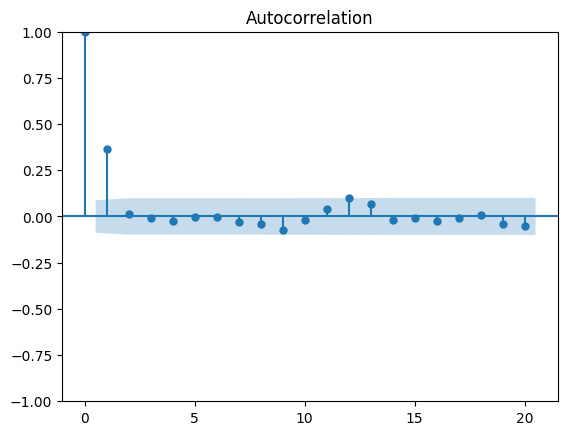

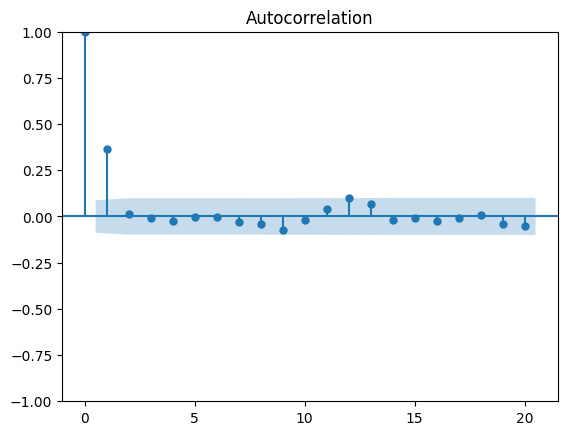

In [9]:
sm.graphics.tsa.plot_acf(np.array(Ma1), lags=20) #lag가 2인 부분부터 0으로 보면 된다. cut off 되었다.

In [33]:
def PACF(D): #phi_hh, for h = 1, 2, 3,...
    sacf = ACF(D)
    H = len(sacf) #H=21
    L = [sacf[0], sacf[1]] #phi_00 =1, phi_11 = rho_1
    for h in range(2, H): #h=2,3,..., 20
        A = np.zeros((h, h)) # to make h by h matrix 
        B = np.zeros((h, 1)) # to make h by 1 column
        for i in range(h): 
            B[i][0] = sacf[i+1]
            for j in range(h):
                if i > j:
                    A[i][j] = sacf[i-j]
                else:
                    A[i][j] = sacf[j-i]
        A_inv = np.linalg.inv(A)
        X = np.dot(A_inv, B)
        phi_hh = X[-1] # the last of X
        L.append(phi_hh[0]) #강의노트와 다름 !!!!!!!!!!
    plt.plot(L)
    y = [0 for t in range(H)]
    plt.plot(y)
    plt.show()
    return L

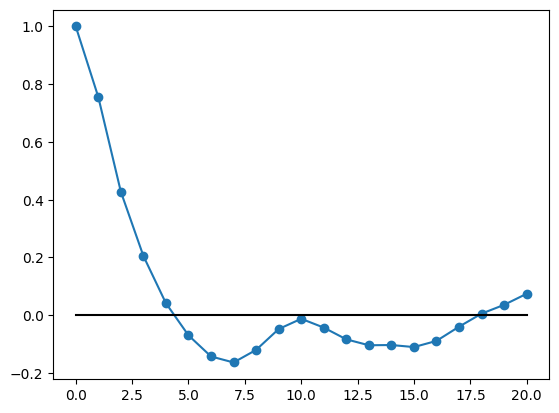

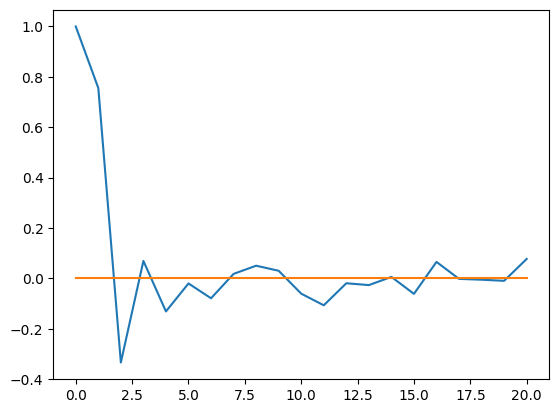

In [34]:
pacf_11 = PACF(Arma11)

In [ ]:
pacf_22 = PACF(Arma22)

In [15]:
def PACF_python(D):
    sm.graphics.tsa.plot_pacf(np.array(D), lags=20)
    plt.show()

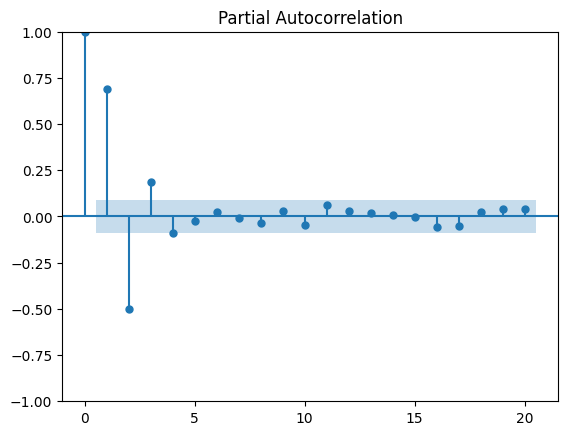

In [18]:
PACF_python(Arma21)